<a href="https://colab.research.google.com/github/Kevin2558/Data_Science_Borrador/blob/main/07_Deep_Learning/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalación de librerías necesarias**

* *torch:* La librería base de PyTorch (tensores, autograd, redes, etc.)
* *torchvision:* Datasets, modelos y transformaciones para visión computacional.
* *matplotlib:* Para graficar.
* *pillow:* Para manipular imágenes (abre, redimensiona, convierte, etc.)

Obs: -q hace que la instalación sea silenciosa

In [1]:
!pip install -q torch torchvision matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.6 MB/s eta 0:00:00


# **Importación de las librerías**

* *torch:* Base para crear tensores y modelos
* *torch.nn.functional:* Operaciones como convolución, activaciones, etc.
* *matplotlib.pyplot:* Para visualizar imágenes o resultados.
* *PIL.Image:* Abre y manipula imágenes (como JPG o PNG)
* *torchvision.transforms:* Funciones para preprocesar imágenes (escalar, normalizar, convertir a tensor, etc.)
* *request:* Para descargar archivos desde una URL.
* *io:* Para manejar el contenido binario que viene de la URL como si fuera un archivo.


In [11]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import requests
import io

# **Carga y preprocesamiento de una imágen**

Realizaremos un ejemplo de utilización de los filtros.

En este caso, convertiremos una imagen descargada desde internet en una imagen que PyTorch pueda procesar.

In [3]:
# url contendrá la dirección web de la imagen a utilizar
url = "https://pytorch.org/assets/images/deeplab1.png"

# Con la siguiente línea descargaremos la imagen desde la web. Objeto que
# contiene la respuesta HTTP.
response = requests.get(url)

# Veamos lo que hacen las siguientes funciones:

# * io.BytesIO() convierte el contenido de la respuesta HTTP en un flujo de
#   bytes. Esto es necesario debido a que Image.open() espera un objeto tipo
#   archivo
# * Image.open() abre el flujo anterior en una imagen con PIL (Python Imaging
#   Library). Se propósito es leer los metadatos del archivo y decodificarla
# * .convert("RGB") asegura que la imágen tenga 3 canales (rojo, verde y azul)
img_pil  = Image.open(io.BytesIO(response.content)).convert("RGB")

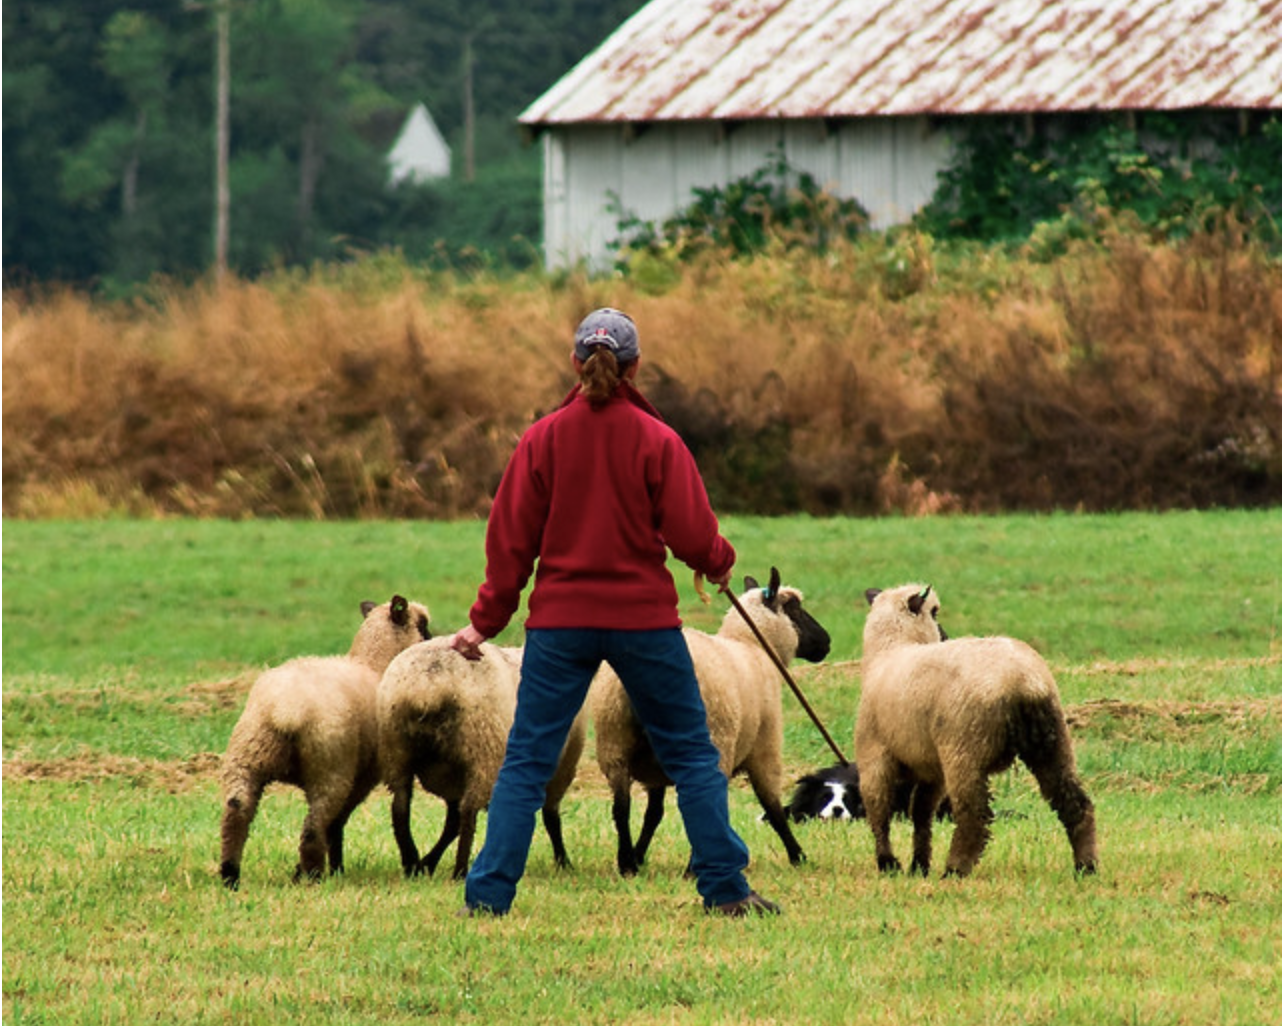

In [ ]:
# Visualizamos la imagen

img_pil

In [12]:
# Redimensionamiento a 256×256 para simplicidad

# * transforms.Compose() crea una secuencia de transformaciones
# * transforms.Resize() cambia el tamaño de la imagen, en este caso 256x256
# * transforms.ToTensor() convierte la imagen a un tensor de PyTorch con forma
#                         (3, 256, 256) y valores entre [0, 1]

to_tensor = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()          # Normalizamos los valores en [0, 1]
])

# Convertir a tensor para procesamiento con PyTorch
img = to_tensor(img_pil).unsqueeze(0)   # shape (1,3,256,256)

# Así, lo convertimos a un tensor de 4 dimensiones (mini-batch):

# * 1: Batch size, hay una sola imagen (no es un lote grande), cada coma aquí
#      es una imagen más
# * 3: Canales de color, la imagen tiene 3 canales RGB, cada coma aquí es un
#      canal más de color
# * 256: Alto (height), altura de la imagen
# * 256: Ancho (widht), anchura de la imagen

In [13]:
# Visualicemos la imagen transformada a tensor

img

tensor([[[[0.4431, 0.1608, 0.1412,  ..., 0.7882, 0.6863, 0.7451],
          [0.4510, 0.1765, 0.1529,  ..., 0.6471, 0.7176, 0.8353],
          [0.4549, 0.1882, 0.1647,  ..., 0.6431, 0.8118, 0.8510],
          ...,
          [0.7725, 0.6824, 0.6118,  ..., 0.8039, 0.6941, 0.7216],
          [0.7333, 0.6667, 0.6078,  ..., 0.7765, 0.7569, 0.7961],
          [0.7451, 0.6471, 0.5725,  ..., 0.7020, 0.7804, 0.7922]],

         [[0.4941, 0.2392, 0.2157,  ..., 0.6627, 0.5412, 0.6275],
          [0.4941, 0.2471, 0.2275,  ..., 0.4588, 0.5725, 0.7490],
          [0.4941, 0.2471, 0.2314,  ..., 0.4706, 0.6902, 0.7529],
          ...,
          [0.7647, 0.6706, 0.6824,  ..., 0.7569, 0.7412, 0.7294],
          [0.7765, 0.6902, 0.6902,  ..., 0.7176, 0.7412, 0.7294],
          [0.8314, 0.7176, 0.6784,  ..., 0.6824, 0.7216, 0.7333]],

         [[0.4667, 0.2078, 0.2000,  ..., 0.6000, 0.4196, 0.5294],
          [0.4745, 0.2196, 0.2118,  ..., 0.3725, 0.4902, 0.7255],
          [0.4784, 0.2275, 0.2157,  ..., 0

# **Kernel**

Definiremos un kernel, en este caso el kernel Sobel vertical, para visualizar su efecto sobre la imagen. Este es un kernel clásico de detección de bordes verticales.

In [ ]:
# Lo que hace este kernel es restar la información horizontal (de izquierda a
# derecha)
sobel_v = torch.tensor([[-1., 0., 1.],
                        [-2., 0., 2.],
                        [-1., 0., 1.]])

In [ ]:
# Como tenemos 3 canales (RGB) creamos 3 copias del kernel para cada canal.
# Así tenemos 3 kernels de 1 canal, de 3x3 cada uno.
kernel = sobel_v.repeat(3, 1, 1, 1)

In [ ]:
kernel

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]],


        [[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]],


        [[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])

# **Convoluciones**

Una convolución es una operación matemática que permite a una red extraer patrones locales de una imagen, como bordes, texturas, esquinas, etc.

En el contexto de imágenes, una convolución es como un "filtro deslizante" que pasa por toda la imagen y calcula valores nuevos en base a su vecindario, el cual depende del tamaño del filtro.

La función *F.conv2d()* es la que realiza este proceso, veamos sus parámetros:

In [ ]:
edge_map = F.conv2d(img, # Tensor de entrada (1, 3, 256, 256)
                    kernel, # Tensor de filtros (3, 1, 3, 3)
                    bias=None, # Sesgo, en este caso no lo usamos
                    stride=1, # Se mueve de a 1 píxel
                    padding=1, # Se añade una marco de 1 espacio para conservar
                               # el tamaño
                    groups=3 # Hace la convolución separada por canal
                    )

In [ ]:
# Normalizar a [0,1] para visualizar mejor
edge_map = (edge_map - edge_map.min()) / (edge_map.max() - edge_map.min())

Procedemos a visualizar la imagen original y el resultado de aplicarle el kernel de detección de bordes verticales.

* *edge_map.squeeze():* Remueve la dimensión del batch (3, 256, 256)
* *.permute(1, 2, 0):* Convierte de (CH,W) a (H,W,C) necesario para *imshow* (C: canales, H: altura, W: anchura)

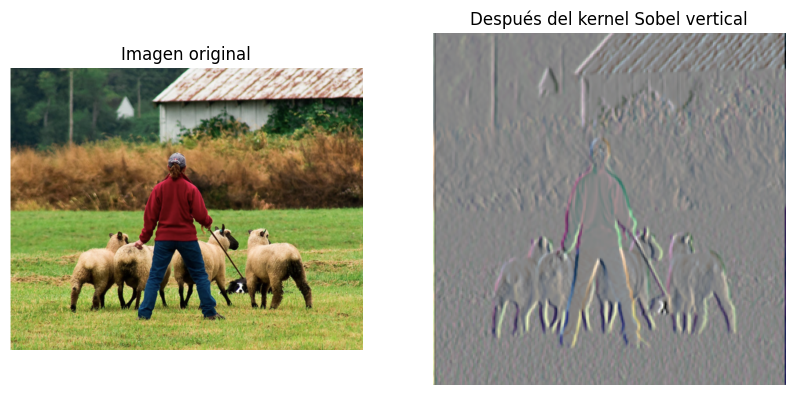

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_pil); axes[0].set_title("Imagen original"); axes[0].axis("off")
axes[1].imshow(edge_map.squeeze().permute(1,2,0));
axes[1].set_title("Después del kernel Sobel vertical"); axes[1].axis("off")
plt.show()

# **Red Neuronal Convolucional Simple**

Procedamos a definir nuestra primera CNN con PyTorch. Para esto importaremos el módulo torch.nn, el cual contiene clases para definir modelos.

## **Clases**

Una clase es un molde o plantilla para crear objetos. Permite agrupar datos (atributos) y comportamientos (métodos) en una sola estructura.

Pensemos a la clase como el plano de una casa. A partir de este plano podemos construir muchas casas (objetos) que comparten la misma estructura, pero pueden tener detalles diferentes.

Estas clases nos ayudarán a tener una base de cualquier modelo de red neuronal, a crear capas de la red, a manejar los conjuntos de datos, a optimizar, etc.

Representa la estructura del modelo, la cual no se modifica, por lo que nos ahorra líneas de código que no tendremos que escribir.

In [ ]:
import torch
import torch.nn as nn

## **Modelo**

Procedamos a definir el modelo.

* *nn.Module:* Estructura heredada, nos permite construir redes personalizadas.
* *__init__():* Constructor, es decir, una función especial que ejecuta automáticamente cuando creas un objeto de una clase.
* *super().__init__():* Llama al constructor de nn.Module.

### **Bloques de capas convolucionales**

* *nn.Sequential():* Agrupa capas que se aplican en orden
* *nn.Conv2d():* Capa convolucional
* *nn.BatchNorm2d():* Normaliza cada canal de salida (acelera y estabiliza el entrenamiento)
* *nn.ReLU():* Función de activacion (introduce no linealidad)
* *nn.MaxPool2d(2):* Reduce el tamaño de la entrada a la mitad

Obs: En los bloques 2 y 3 se aumentan los filtros y se vuelve a reducir a la mitad las dimensiones espaciales.

## **Método forward**

Método obligatorio que define como el dato entra y fluye por la red. Se aplica cada bloque secuencialmente. También, guarda los tamaños intermedios para poder imprimirlos y entender como cambia la forma del tensor.

In [ ]:
class DemoCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 32×32 -> 32×32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)                                        # 32×32 -> 16×16
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # 16×16 -> 16×16
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)                                        # 16×16 -> 8×8
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),#  8×8 ->  8×8
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)                                        #  8×8 -> 4×4
        )

    def forward(self, x):
        shapes = []
        x = self.block1(x); shapes.append(("Block1 out", x.shape))
        x = self.block2(x); shapes.append(("Block2 out", x.shape))
        x = self.block3(x); shapes.append(("Block3 out", x.shape))
        return x, shapes

Ahora, procedamos a probar la red con un tensor aleatorio (imagen dummy).

* *with torch.no_grad():* Bloque donde no se computan gradientes (no hay backpropagation), útil para evaluación o testeo
* *.view(batch, -1):* Aplana todo excepto la dimensión del batch, para conectarlo a una capa completamente conectada

In [ ]:
# Generemos la imagen aleatoria, dummy image: batch=1, RGB, 32×32
dummy = torch.randn(1, 3, 32, 32)

# Creamos la instancia del modelo.
model = DemoCNN()
with torch.no_grad():
    out, shape_log = model(dummy)

# Con lo siguiente, imprimiremos el tamaño del tensor después de la aplicación
# de cada bloque convolucional
for name, shape in shape_log:
    print(f"{name}: {tuple(shape)}")

# Con lo siguiente, aplanamos el output para conectarlo a una capa densa
flattened = out.view(out.size(0), -1)
print("Flattened vector shape:", tuple(flattened.shape))


Block1 out: (1, 32, 16, 16)
Block2 out: (1, 64, 8, 8)
Block3 out: (1, 128, 4, 4)
Flattened vector shape: (1, 2048)


# **Entrenamiento de una CNN con CIFAR-10**

Procedamos a crear otra CNN y en esta caso la entrenaremos con un dataset incluido en torchvision.

## **Carga y preprocesamiento de los datos con CIFAR-10**

Importamos las siguientes librerías:

* *datasets:* Trae datasets populares como CIFAR-10
* *transforms:* Para aplicar preprocesamiento
* *DataLoader:* Para dividir datos en mini-batches
* *tqdm:* Barra de prograso para loops largos

In [ ]:
import torch, torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Definimos las transformaciones para el preprocesamiento
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822,0.4465),(0.2023,0.1994,0.2010))
])

# Cargamos el dataset CIFAR-10 en "data/", separamos en entrenamiento y testeo
# y le aplicamos las transformaciones ya definidas
train_ds = datasets.CIFAR10("data", train=True, download=True, transform=tfms)
test_ds  = datasets.CIFAR10("data", train=False, transform=tfms)

# DataLoader permite iterar sobre el dataset en mini-batches. Construimos el de
# entrenamiento en 32 batches mezclados (evitar overfitting) y sin procesos
# paralelos y el de testeo en 64 batches no mezclados y sin procesos paralelos
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True,  num_workers=0)
test_dl  = DataLoader(test_ds,  batch_size=64, shuffle=False, num_workers=0)

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


## **Modelo**

Al igual que el modelo anterior definimos la CNN pero ahora agregamos una cabeza clasificadora, es decir:

* *Feature extractor:* Aplica 3 bloques convolucionales, como antes, pero ahora encapsulados en *self.features*. Entra un tensor de dimensiones (3, 32, 32) y sale un tensor de dimensiones (128, 4, 4).

* *Clasificación final:* Aplica una capa aplanadora que convierte el tensor (128, 4, 4) a un vector de tamaño 2048, luego una capa completamente conectada de 2048 a 256 con una regularización donde se desactivan 30% de las neuronas en entrenamiento (evitar overfitting) y por último una capa de salida con las 10 clases del dataset CIFAR-10.

In [ ]:
class DemoCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,32,3,1,1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,1,1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64,128,3,1,1),nn.BatchNorm2d(128),nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*4*4, 256), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256, 10)
        )
    def forward(self,x): return self.classifier(self.features(x))

Procedamos a detectar si hay GPU disponible (usa *cuda* si está, sino *cpu*) y pasa el modelo a ese dispositivo.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = DemoCNN().to(device)

Definamos la función de pérdida y el optimizador de los parámetros.

In [ ]:
criterion = nn.CrossEntropyLoss() # Para clasificación multiple (incluye softmax)
# Optimizador Adam
optimizer = torch.optim.Adam(model.parameters(), # Parámetros a optimizar
                             lr=1e-3, # Tasa de aprendizaje
                             weight_decay=1e-4 # Regularización L2
                             )

Visualicemos una época de entrenamiento. El proceso es el siguiente:

* *model.train():* Llamamos al método de la clase Module, para poner al modelo en modo entrenamiento.
* *tqdm():* Feedback visual de cuánto falta por procesar, útil para loops largos.

Bucle sobre los mini-batches:

* Mueve xb e yb a GPU/CPU
* Calcula la pérdida con *criterion()*
* Limpia gradientes con *zero_grad()*
* Calcula gradientes con *loss.backward()*
* Actualiza parámetros con *optimizer.step()*


In [ ]:
model.train()
for xb,yb in tqdm(train_dl, desc="Training epoch 1"):
    xb,yb = xb.to(device), yb.to(device)
    loss = criterion(model(xb), yb)
    optimizer.zero_grad(); loss.backward(); optimizer.step()

Training epoch 1: 100%|██████████| 1563/1563 [00:21<00:00, 71.34it/s]


## **Evaluar exactitud (accuracy)**

Procedamos a evaluar el modelo en una época, calculando la precisión del mismo. El proceso es el siguiente:

* *model.eval():* Desactiva Dropout y BatchNorm (modo evaluación)
* *with torch.no_grad():* No computa gradientes
* *.argmax(1):* Elige la clase con mayor probabilidad
* Se compara con la clase real y se suma cuántas están correctas
* Se muestre el porcentaje de aciertos en la primera época

In [ ]:
model.eval(); correct = 0
with torch.no_grad():
    for xb,yb in test_dl:
        preds = model(xb.to(device)).argmax(1).cpu()
        correct += (preds==yb).sum().item()
print(f"Val accuracy after 1 epoch: {correct/len(test_ds):.2%}")

Val accuracy after 1 epoch: 64.99%


## **Visualización predicciones**

Importamos las librerías para visualizar:

* *matplotlib.pyplot:* Para mostrar imágenes
* *torchvision.utils:* Funciones útiles, como *make_grid*
* *.transforms.functional:* Para aplicar transformaciones individualmente



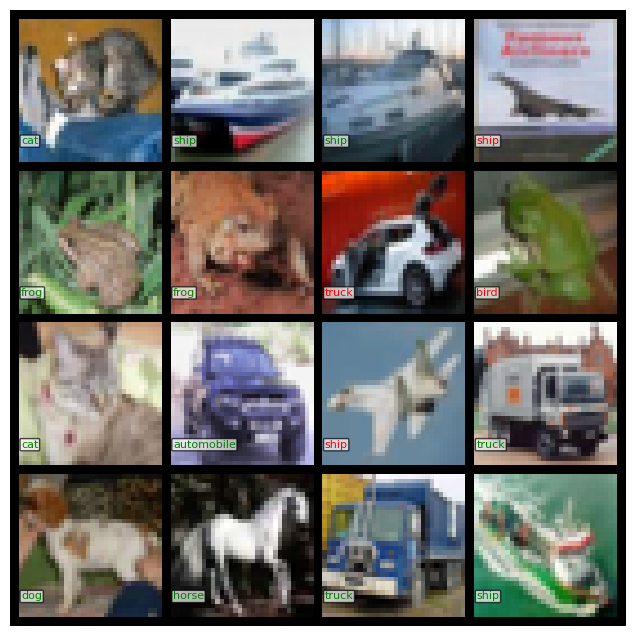

In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import torchvision.transforms.functional as F

# 1. Tomamos un batch de 16 imágenes del conjunto de prueba
data_iter = iter(test_dl)
imgs, labels = next(data_iter)          # imgs: (B,3,32,32)

# 2. Pasamos por la red para obtener predicciones del modelo (modo evaluación)
model.eval() # Activamos el modo evaluación
with torch.no_grad():
    logits = model(imgs.to(device)) # Pasamos las imágenes por la red
    preds  = logits.argmax(1).cpu() # Devuelve el índice (clase) con mayor proba

# 3. Des-normaliza las imágenes para mostrarlas en RGB
def denorm(t):
    mean = torch.tensor((0.4914,0.4822,0.4465)).view(3,1,1)
    std  = torch.tensor((0.2023,0.1994,0.2010)).view(3,1,1)
    return torch.clamp(t * std + mean, 0, 1)

grid = vutils.make_grid(denorm(imgs)[:16], nrow=4, padding=2)

# 4. Plot con títulos
plt.figure(figsize=(8,8))
plt.imshow(grid.permute(1,2,0))
plt.axis("off")

# 5. Añadimos textos de etiqueta-real / pred-modelo
classes = test_ds.classes                # ['airplane', 'automobile', ...]
for idx in range(16):
    y = idx // 4; x = idx % 4
    true = classes[labels[idx]]
    pred = classes[preds[idx]]
    color = "green" if true==pred else "red"
    plt.text(x*34+2, y*34+30, f"{pred}",
             color=color, fontsize=8, ha="left", va="bottom",
             bbox=dict(boxstyle="round,pad=0.1", fc="white", alpha=0.7))
plt.show()

In [ ]:
## Entrenamiento 10 epoch
# 1.  Parámetros ----------------------------------------------------------
device   = "cuda" if torch.cuda.is_available() else "cpu"
epochs   = 10          # ← cambia aquí el nº de épocas
b_train  = 128         # batch entrenamiento
b_test   = 256         # batch validación
lr       = 1e-3
wd       = 1e-4

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# 5.  Función de evaluación ---------------------------------------------
@torch.no_grad()
def evaluate(net, loader):
    net.eval(); correct = total = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = net(xb).argmax(1)
        correct += (preds == yb).sum().item()
        total   += yb.size(0)
    return correct / total

# 6.  Entrenamiento -------------------------------------------------------
for ep in range(1, epochs + 1):              # ← 1. Recorre cada época
    model.train()                            # ← 2. Activa modo entrenamiento
    running = 0                              # ← 3. Acumulador de loss

    loop = tqdm(train_dl,                    # ← 4. Barra de progreso
                desc=f"Epoch {ep}/{epochs}",
                leave=False)

    for xb, yb in loop:                      # ← 5. Recorre mini-batches
        xb, yb = xb.to(device), yb.to(device)            # 5a. GPU/CPU
        loss = criterion(model(xb), yb)                  # 5b. Forward + loss

        optimizer.zero_grad()               # 5c. Limpia gradientes previos
        loss.backward()                     # 5d. Retro-propaga (∂loss/∂θ)
        optimizer.step()                    # 5e. Actualiza pesos (Adam)

        running += loss.item() * xb.size(0)             # 5f. Suma loss
        loop.set_postfix(loss=loss.item())              # 5g. Muestra loss inst.

    scheduler.step()                         # ← 6. Ajusta el learning-rate

    train_loss = running / len(train_ds)     # ← 7. Pérdida promedio de la época
    val_acc = evaluate(model, test_dl)       # ← 8. Accuracy en conjunto validación

    print(f"Epoch {ep:02d}: train loss {train_loss:.3f} | "
          f"val acc {val_acc*100:.2f}%")     # ← 9. Resumen de la época

Epoch 01: train loss 0.929 | val acc 73.46%


Epoch 02: train loss 0.787 | val acc 75.89%


Epoch 03: train loss 0.698 | val acc 76.90%


Epoch 4/10:   5%|▍         | 78/1563 [00:01<00:33, 44.65it/s, loss=0.575]